In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import numpy as np


def add_relative_to_current_source_file_path_to_sys_path(relpath):
    import os, sys, inspect
    path = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile(inspect.currentframe()))[0],relpath)))
    if path not in sys.path:
        sys.path.insert(0,path)

add_relative_to_current_source_file_path_to_sys_path("../../shims/toric")   

import toric
import toric.samples

#
# Helper functions for the toric libary
#

def vector3_to_str(v):
    return "(%.2f, %.2f, %.2f)" % (v.x(), v.y(), v.z())
    
def toric_to_str(t):
    return "(a = %.2f°, t = %2.f°, p = %.2f°)" % (t.getAlpha().valueDegrees(), t.getTheta().valueDegrees(), t.getPhi().valueDegrees())

def toric_to_cam_np(t, PA, PB):
    c = toric.Toric3_ToWorldPosition(t, PA, PB)
    return np.array([c.x(),c.y(),c.z()])

In [4]:
PA = toric.Vector3(0,0,0)
PB = toric.Vector3(1,0,0)

t = toric.Toric3(toric.RadianPi(np.radians(45)),toric.Radian2Pi(np.radians(90)),toric.RadianPi(np.radians(0)))
print toric_to_str(t)

c = toric.Toric3_ToWorldPosition(t, PA, PB)
print vector3_to_str(c)

print toric_to_cam_np(t, PA, PB)

(a = 45.00°, t = 90°, p = 0.00°)
(1.00, -1.00, 0.00)
[ 1. -1.  0.]


In [6]:
'''
This useful mapper function sticks person A at the origin, and person B at X=1
'''
PA = toric.Vector3(0,0,0)
PB = toric.Vector3(1,0,0)

def map_toric_to_cam(a):
    t = toric.Toric3(toric.RadianPi(np.radians(a[0])),toric.Radian2Pi(np.radians(a[1])),toric.RadianPi(np.radians(a[2])))
    return toric_to_cam_np(t, PA, PB)

'''
This function scatterplots an array of camera positions
'''
def scatterplot_camera_arr(C, title):
    plt.scatter(C[:,0],C[:,1],c=t,cmap='copper',linewidths=0)
    plt.scatter([PA.x(), PB.x()],[PA.y(), PB.y()],c="red",linewidths=0)
    plt.axes().set_aspect('equal')
    plt.title(title)
    
    

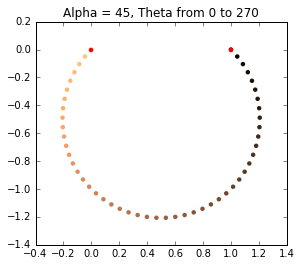

In [7]:
# Let's plot sweeping Theta from 0 to 270 degrees,
# While we keep Alpha at 45 degrees

theta = np.linspace(0,270)
alpha = np.linspace(45,45)
phi   = [0] *len(alpha)
t     = np.arange(len(phi))

P = np.c_[ alpha, theta, phi ]
C = np.apply_along_axis(map_toric_to_cam, axis=1, arr=P)

scatterplot_camera_arr(C, "Alpha = 45, Theta from 0 to 270")


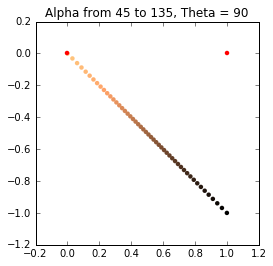

In [8]:
alpha = np.linspace(45,135)
theta = np.linspace(90,90)
phi   = [0] *len(alpha)
t     = np.arange(len(phi))

P = np.c_[ alpha, theta, phi ]
C = np.apply_along_axis(map_toric_to_cam, axis=1, arr=P)

scatterplot_camera_arr(C, "Alpha from 45 to 135, Theta = 90")


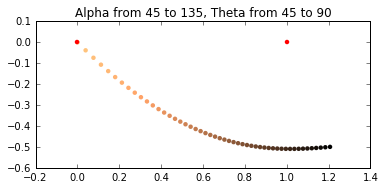

In [9]:
alpha = np.linspace(45,135)
theta = np.linspace(45,90)
phi   = [0] *len(alpha)
t     = np.arange(len(phi))

P = np.c_[ alpha, theta, phi ]
C = np.apply_along_axis(map_toric_to_cam, axis=1, arr=P)

scatterplot_camera_arr(C, "Alpha from 45 to 135, Theta from 45 to 90")